## Import Libaries

In [ ]:
from google.colab import drive


In [ ]:
import pandas as pd

## Import Data

In [ ]:

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Dataset/sport_data.csv')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Basic Data Analysis

In [ ]:
data

,Age,Height,Sex,Sport
0,13,3,Male,Soccer
1,16,4,Male,Soccer
2,17,4,Male,Soccer
3,15,5,Male,Basketball
4,17,6,Male,Basketball
5,18,5,Male,Basketball
6,15,3,Male,Hockey
7,13,3,Male,Hockey
8,13,4,Male,Hockey
9,13,3,Female,Soccer


In [ ]:
data.head()

,Age,Height,Sex,Sport
0,13,3,Male,Soccer
1,16,4,Male,Soccer
2,17,4,Male,Soccer
3,15,5,Male,Basketball
4,17,6,Male,Basketball


In [ ]:
data.tail()

,Age,Height,Sex,Sport
13,17,4,Female,Basketball
14,19,6,Female,Basketball
15,13,3,Female,Hockey
16,14,4,Female,Hockey
17,14,3,Female,Hockey


In [ ]:
data.shape

(18, 4)

In [ ]:
data.describe()

,Age,Height
count,18.000000,18.000000
mean,15.166667,4.000000
std,1.917412,1.028992
min,13.000000,3.000000
25%,13.250000,3.000000
50%,15.000000,4.000000
75%,16.750000,4.750000
max,19.000000,6.000000


# Pre-Process Data

In [ ]:
data['Sex'].replace(['Female', 'Male'], [0, 1], inplace=True)

In [ ]:
data.head()

,Age,Height,Sex,Sport
0,13,3,1,Soccer
1,16,4,1,Soccer
2,17,4,1,Soccer
3,15,5,1,Basketball
4,17,6,1,Basketball


In [ ]:
data.tail()

,Age,Height,Sex,Sport
13,17,4,0,Basketball
14,19,6,0,Basketball
15,13,3,0,Hockey
16,14,4,0,Hockey
17,14,3,0,Hockey


# Import Machine Learning Libraries

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(columns='Sport')

In [ ]:
X.head()

,Age,Height,Sex
0,13,3,1
1,16,4,1
2,17,4,1
3,15,5,1
4,17,6,1


In [ ]:
y = data.drop(columns=['Age', 'Height', 'Sex'])

In [ ]:
y.head()

,Sport
0,Soccer
1,Soccer
2,Soccer
3,Basketball
4,Basketball


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
X_train

,Age,Height,Sex
12,16,5,0
9,13,3,0
15,13,3,0
7,13,3,1
11,16,4,0
5,18,5,1
2,17,4,1
16,14,4,0
8,13,4,1
3,15,5,1


# Build Machine Learning Model

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Test ML Model

In [ ]:
test = clf.predict(X_test)

In [ ]:
test

array(['Hockey', 'Basketball', 'Soccer', 'Hockey', 'Basketball', 'Soccer'],
      dtype=object)

In [ ]:
y_test

,Sport
17,Hockey
4,Basketball
6,Hockey
10,Soccer
14,Basketball
1,Soccer


# Check for Effiency

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy = accuracy_score(y_test, test)

In [ ]:
accuracy

0.6666666666666666

# Save Model

In [ ]:
import joblib

In [ ]:
joblib.dump(clf, 'ml_sport_model.joblib')

['ml_sport_model.joblib']

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

In [ ]:
classification_report(y_test,test)

'              precision    recall  f1-score   support\n\n  Basketball       1.00      1.00      1.00         2\n      Hockey       0.50      0.50      0.50         2\n      Soccer       0.50      0.50      0.50         2\n\n    accuracy                           0.67         6\n   macro avg       0.67      0.67      0.67         6\nweighted avg       0.67      0.67      0.67         6\n'

In [ ]:
c_matrix = confusion_matrix(y_test, test)
c_matrix

array([[2, 0, 0],
       [0, 1, 1],
       [0, 1, 1]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


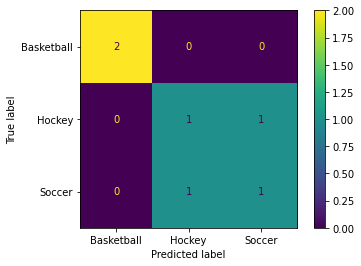

In [ ]:
plot_confusion_matrix(clf,X_test, y_test)

In [ ]:
y_test

,Sport
17,Hockey
4,Basketball
6,Hockey
10,Soccer
14,Basketball
1,Soccer


In [ ]:
print(classification_report(y_test, test))

              precision    recall  f1-score   support

  Basketball       1.00      1.00      1.00         2
      Hockey       0.50      0.50      0.50         2
      Soccer       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6

